## 1- Exploration des relevés de données des bâtiments¶ 

In [2]:
# importation des librairies nécessaires à l'exploration
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt

import seaborn as sns
import pingouin as pg

### Données 2015 : 

In [3]:
# Chargement du fichier de 2015
filepath_2015 = '2015-building-energy-benchmarking.csv'
df_2015 = pd.read_csv(filepath_2015)
df_2015.head(50)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
5,9,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,"{'latitude': '47.6164389', 'longitude': '-122....",7,DOWNTOWN,1999,...,2.81,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576
6,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,"{'latitude': '47.6141141', 'longitude': '-122....",7,DOWNTOWN,1926,...,2.37,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
7,11,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,"{'latitude': '47.61290234', 'longitude': '-122...",7,DOWNTOWN,1926,...,1.77,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
8,12,2015,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,939000080,"{'latitude': '47.60258934', 'longitude': '-122...",7,DOWNTOWN,1904,...,1.83,No,NaN,Compliant,NaN,NaN,14.0,NaN,19.0,18379
9,13,2015,Multifamily MR (5-9),Mid-Rise Multifamily,LYON BUILDING,939000105,"{'latitude': '47.60278416', 'longitude': '-122...",7,DOWNTOWN,1910,...,2.51,No,NaN,Compliant,NaN,NaN,14.0,NaN,19.0,18379


In [4]:
df_2015['PropertyName'].unique()

array(['MAYFLOWER PARK HOTEL', 'PARAMOUNT HOTEL', 'WESTIN HOTEL', ...,
       'CIRRUS', 'WEDGEWOOD ESTATES BLDG A', 'WEDGEWOOD ESTATES BLDG B'],
      dtype=object)

In [5]:
df_2015['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

In [6]:
# Passage des chaînes de caractères en minuscule
df_2015['PropertyName'] = df_2015["PropertyName"].str.lower()
df_2015['Neighborhood'] = df_2015["Neighborhood"].str.lower()

Text(0.5, 1.0, 'Missing values by feature')

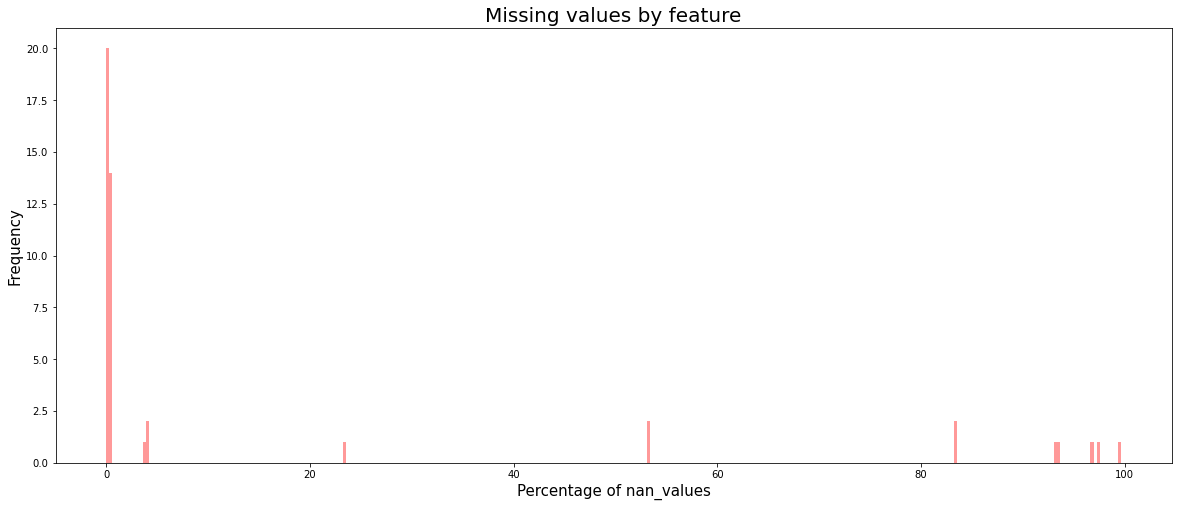

In [7]:
# densité des colonnes avec valeurs manquantes : 
nan_values = df_2015.isnull().sum()
nan_values = nan_values / df_2015.shape[0] *100

plt.figure(figsize=(20,8))
sns.distplot(nan_values, kde=False, bins=np.int(df_2015.shape[0]/10), color = "Red")
plt.xlabel("Percentage of nan_values", size = 15)
plt.ylabel("Frequency", size = 15)
plt.title("Missing values by feature", size = 20)

In [8]:
# Suppression des colonnes avec plus de 95% de valeurs manquantes
df_2015 = df_2015.loc[:, df_2015.isnull().mean() <.95]

In [9]:
# Chargement du fichier de 2016
filepath_2016 = '2016-building-energy-benchmarking.csv'
df_2016 = pd.read_csv(filepath_2016)
df_2016.head(50)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,1.276453e+04,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,5.145082e+04,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,1.493800e+04,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,1.811213e+04,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,8.803998e+04,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7371434.0,4.715182e+04,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,...,8.239199e+05,2811215.0,2.947580e+04,2947580.0,False,NaN,Compliant,NaN,176.14,2.12
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,...,1.065843e+06,3636655.0,3.851890e+03,385189.0,False,NaN,Compliant,NaN,221.51,2.16
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.0,0939000080,...,2.138898e+06,7297919.0,6.425900e+04,6425900.0,False,NaN,Compliant,NaN,392.16,2.39
9,13,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon Building,607 - 3rd Ave.,Seattle,WA,98104.0,0939000105,...,7.420912e+05,2532015.0,1.002026e+04,1002026.0,False,NaN,Compliant,NaN,151.12,2.37


In [10]:
df_2016['PropertyName'].unique()

array(['Mayflower park hotel', 'Paramount Hotel',
       '5673-The Westin Seattle', ..., 'Queen Anne Pool',
       'South Park Community Center', 'Van Asselt Community Center'],
      dtype=object)

In [11]:
df_2016['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

In [12]:
# Passage des chaînes de caractères en minuscule
df_2016['PropertyName'] = df_2016["PropertyName"].str.lower()
df_2016['Neighborhood'] = df_2016["Neighborhood"].str.lower()

Text(0.5, 1.0, 'Missing values by feature')

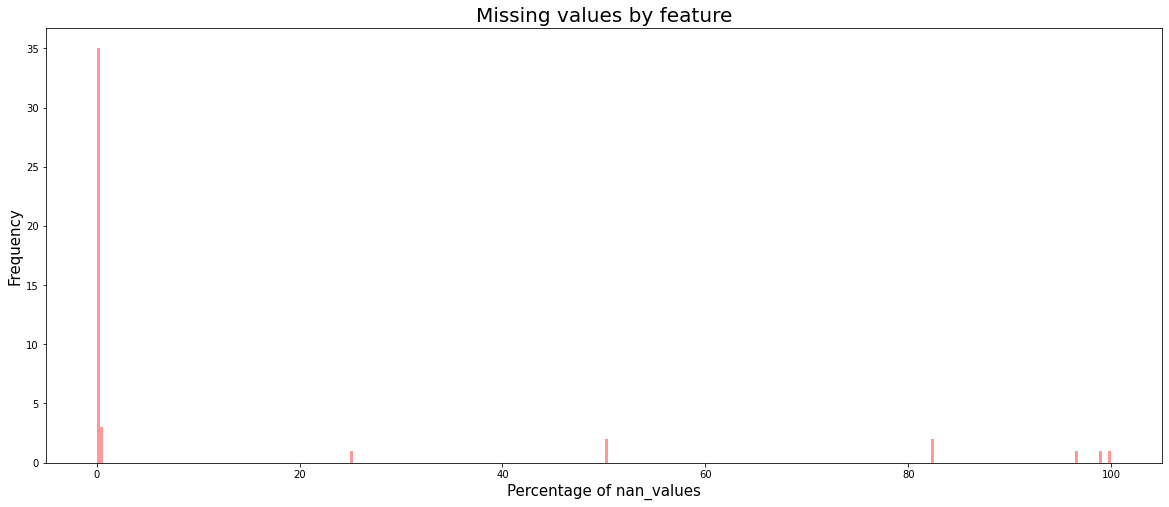

In [13]:
# densité des colonnes avec valeurs manquantes : 
nan_values = df_2016.isnull().sum()
nan_values = nan_values / df_2016.shape[0] *100

plt.figure(figsize=(20,8))
sns.distplot(nan_values, kde=False, bins=np.int(df_2016.shape[0]/10), color = "Red")
plt.xlabel("Percentage of nan_values", size = 15)
plt.ylabel("Frequency", size = 15)
plt.title("Missing values by feature", size = 20)

In [14]:
# Suppression des colonnes avec plus de 95% de valeurs manquantes
df_2016 = df_2016.loc[:, df_2016.isnull().mean() <.95]

In [15]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'ComplianceStatus',
       '2010 Cen

In [16]:
df_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
 

In [17]:
# Harmonisation des noms de colonnes avec le dataset de 2016
df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity",
                        "Zip Codes" : "ZipCode"}, inplace=True)

In [18]:
# Ajout des latitudes et longitudes des bâtiments en fonction de leur ID
coord = df_2016[["OSEBuildingID", "Latitude", "Longitude"]]
df_2015 = df_2015.merge(coord, on="OSEBuildingID")

In [19]:
df_2015.shape

(3284, 46)

In [20]:
df_2016.shape

(3376, 43)

In [21]:
# Création d'un seul DataSet
df = pd.concat([df_2015,df_2016], join="outer", ignore_index=True, verify_integrity=True)
df.head(50)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
0,1,2015,NonResidential,Hotel,mayflower park hotel,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,downtown,1927,...,NaN,14.0,NaN,31.0,18081.0,47.61220,-122.33799,NaN,NaN,NaN
1,2,2015,NonResidential,Hotel,paramount hotel,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,downtown,1996,...,NaN,14.0,NaN,31.0,18081.0,47.61317,-122.33393,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,westin hotel,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,downtown,1969,...,NaN,56.0,NaN,31.0,18081.0,47.61393,-122.33810,NaN,NaN,NaN
3,5,2015,NonResidential,Hotel,hotel max,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,downtown,1926,...,NaN,56.0,NaN,31.0,18081.0,47.61412,-122.33664,NaN,NaN,NaN
4,8,2015,NonResidential,Hotel,warwick seattle hotel,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,downtown,1980,...,NaN,56.0,NaN,31.0,19576.0,47.61375,-122.34047,NaN,NaN,NaN
5,9,2015,Nonresidential COS,Other,west precinct (seattle police),660000560,"{'latitude': '47.6164389', 'longitude': '-122....",7,downtown,1999,...,NaN,56.0,NaN,7.0,19576.0,47.61623,-122.33657,NaN,NaN,NaN
6,10,2015,NonResidential,Hotel,camlin worldmark hotel,660000825,"{'latitude': '47.6141141', 'longitude': '-122....",7,downtown,1926,...,NaN,14.0,NaN,31.0,18081.0,47.61390,-122.33283,NaN,NaN,NaN
7,11,2015,NonResidential,Other,paramount theater,660000955,"{'latitude': '47.61290234', 'longitude': '-122...",7,downtown,1926,...,NaN,14.0,NaN,31.0,18081.0,47.61327,-122.33136,NaN,NaN,NaN
8,12,2015,NonResidential,Hotel,courtyard by marriott - alaska bldg seattle,939000080,"{'latitude': '47.60258934', 'longitude': '-122...",7,downtown,1904,...,NaN,14.0,NaN,19.0,18379.0,47.60294,-122.33263,NaN,NaN,NaN
9,13,2015,Multifamily MR (5-9),Mid-Rise Multifamily,lyon building,939000105,"{'latitude': '47.60278416', 'longitude': '-122...",7,downtown,1910,...,NaN,14.0,NaN,19.0,18379.0,47.60284,-122.33184,NaN,NaN,NaN


In [22]:
df.shape

(6660, 49)

In [23]:
df['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n',
       'Restaurant', 'University', 'Warehouse', 'Residence Hall',
       'Supermarket / Grocery Store', 'Office'], dtype=object)

In [24]:
df['SecondLargestPropertyUseType'].unique()

array([nan, 'Parking', 'Office', 'Restaurant', 'K-12 School',
       'Non-Refrigerated Warehouse', 'Other - Education',
       'Vocational School', 'Retail Store',
       'Other - Entertainment/Public Assembly', 'Data Center',
       'Swimming Pool', 'Other', 'Courthouse', 'Residence Hall/Dormitory',
       'Distribution Center', 'Self-Storage Facility', 'Other - Services',
       'Laboratory', 'Movie Theater', 'Supermarket/Grocery Store',
       'Medical Office', 'Other - Recreation',
       'Convenience Store without Gas Station',
       'Fitness Center/Health Club/Gym', 'Performing Arts',
       'College/University', 'Other - Restaurant/Bar', 'Adult Education',
       'Multifamily Housing', 'Bar/Nightclub', 'Financial Office',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Bank Branch', 'Food Service',
       'Worship Facility', 'Senior Care Community',
       'Refrigerated Warehouse', 'Hotel', 'Food Sales',
       'Other/Specialty H

In [25]:
# Harmonisation des chaînes de caractères
char_correction = {"Distribution Center\n" : "Distribution Center",
                   "Self-Storage Facility\n" : "Self-Storage Facility",
                   "Restaurant\n" : "Restaurant",
                   "Supermarket / Grocery Store": "Supermarket/Grocery Store",
                   "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in char_correction.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

In [26]:
df['Neighborhood'].unique()

array(['downtown', 'southeast', 'northeast', 'east', 'central', 'north',
       'magnolia / queen anne', 'lake union', 'greater duwamish',
       'ballard', 'northwest', 'southwest', 'delridge',
       'delridge neighborhoods'], dtype=object)

In [27]:
# Harmonisation des quartiers
neighborhood_correction = {"Delridge neighborhoods": "Delridge"}

for key, value in neighborhood_correction.items():
    df["Neighborhood"].loc[df["Neighborhood"].str.contains(key, case=False, regex=False)] = value

In [28]:
df['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Distribution Center', 'Large Office',
       'Retail Store', 'Senior Care Community', 'Medical Office',
       'Hospital', 'Residence Hall', 'Non-Refrigerated Warehouse',
       'SPS-District K-12', 'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket/Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant',
       'University', 'Warehouse', 'Office'], dtype=object)

### # Energy consommation outliers 

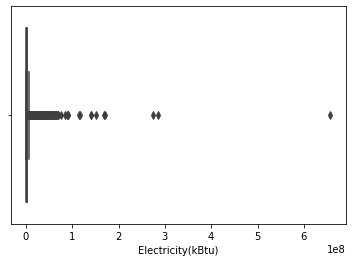

In [29]:
# Energy consommation outliers
sns.boxplot(x='Electricity(kBtu)', data=df)
plt.show()

In [30]:
df['Electricity(kBtu)'].describe()

count    6.642000e+03
mean     3.588767e+06
std      1.249765e+07
min     -1.154170e+05
25%      6.381335e+05
50%      1.167853e+06
75%      2.803182e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64

In [31]:
df.loc[df['Electricity(kBtu)']== df['Electricity(kBtu)'].max()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
6558,49967,2016,Campus,University,university of washington - seattle campus,1625049001,NaN,4,northeast,1900,...,NaN,NaN,NaN,NaN,98105.0,47.65644,-122.31041,NE 45th St & Brooklyn Ave,Seattle,WA


Il existe des bâtiments outliers en terme de consommation d'electricité. il s'agit de : 
"University of washington - seattle campus".
Nous allons d'abord vérifier si c'est le seul campus qui consomme autant d'électricité ou pas. Si d'autres campus consomment l'équivalent de celui ci en électricité, il est donc normal de consommer autant. Si ce n'est pas le cas, cela veut dire que c'est un outlier, il faudrait donc le supprimer. 

In [32]:
df[df['Electricity(kBtu)'] >0.5e+8].head(50)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
122,198,2015,NonResidential,Hospital,seattle children's hospital (main campus),2982800005,"{'latitude': '47.66356652', 'longitude': '-122...",4,northeast,1953,...,NaN,55.0,NaN,48.0,18383.0,47.662310,-122.281460,NaN,NaN,NaN
153,245,2015,NonResidential,Other,centurylink field-stadium,7666204876,"{'latitude': '47.59435403', 'longitude': '-122...",2,greater duwamish,1999,...,NaN,49.0,NaN,20.0,18379.0,47.595440,-122.331590,NaN,NaN,NaN
165,268,2015,NonResidential,Hospital,swedish medical center cherry hill campus,7942600331,"{'latitude': '47.60710663', 'longitude': '-122...",3,central,1990,...,NaN,9.0,NaN,17.0,19578.0,47.607050,-122.309660,NaN,NaN,NaN
168,276,2015,NonResidential,Hospital,harborview medical center,8590900220,"{'latitude': '47.60387131', 'longitude': '-122...",3,east,2000,...,NaN,19.0,NaN,16.0,18379.0,47.603990,-122.323770,NaN,NaN,NaN
185,295,2015,NonResidential,Other,centurylink: 3rd ave 3-d,2302700000,"{'latitude': '47.60683648', 'longitude': '-122...",7,downtown,1955,...,NaN,14.0,NaN,19.0,18081.0,47.606990,-122.334810,NaN,NaN,NaN
232,357,2015,Nonresidential COS,Large Office,seattle municipal tower,942000720,"{'latitude': '47.60491077', 'longitude': '-122...",3,downtown,1990,...,NaN,14.0,NaN,19.0,18379.0,47.605010,-122.329880,NaN,NaN,NaN
258,388,2015,NonResidential,Large Office,rainier tower,2400003,"{'latitude': '47.60816177', 'longitude': '-122...",7,downtown,1976,...,NaN,14.0,NaN,24.0,18081.0,47.608960,-122.334810,NaN,NaN,NaN
270,402,2015,NonResidential,Large Office,us bank centre,1975700080,"{'latitude': '47.61047982', 'longitude': '-122...",7,downtown,1989,...,NaN,14.0,NaN,24.0,18081.0,47.610540,-122.334660,NaN,NaN,NaN
301,435,2015,NonResidential,Other,washington state convention center,1978200105,"{'latitude': '47.61158623', 'longitude': '-122...",7,downtown,1990,...,NaN,14.0,NaN,31.0,18081.0,47.611950,-122.331670,NaN,NaN,NaN
305,439,2015,NonResidential,Mixed Use Property,fisher plaza - east building komo-tv studios,1991200150,"{'latitude': '47.61932082', 'longitude': '-122...",7,lake union,2001,...,NaN,56.0,NaN,40.0,18390.0,47.619150,-122.348570,NaN,NaN,NaN


#### il y a :
1 aeroport qui consomme 4 fois moins

6 hopitaux qui consomment 6 fois moins 

il semble que la consommation de l'université de Washington soit excessive. Nous supprimons cette université pour éviter de polluer nos données 

In [33]:
# Retrait de l'université de Washington
df = df.loc[df["Electricity(kBtu)"] != df["Electricity(kBtu)"].max()]

In [34]:
# outliers energy < 0
df.loc[df['Electricity(kBtu)']<0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
6490,49784,2016,NonResidential,Small- and Mid-Sized Office,bullitt center,7234600195,NaN,3,central,2013,...,NaN,NaN,NaN,NaN,98122.0,47.61432,-122.31257,1501 E. Madison St.,Seattle,WA


il s'agit du "Bullitt center" dans le quartier central hebergeant des bureaux
Après recherche sur internet, cet immeuble est à énérgie positive. 
Il possède des panneaux solaires pour s'alimenter en électricité et aussi produire de l'électricité verte qui pourra être acheminé à des bâtiments de la ville. Il possède aussi des puits de géothermie, est construit avec des matériaux respectueux de l'environnement et a une orientation qui lui permet de profiter de 82% d'ensoleillement. Nous gardons cet immeuble

### # CO2 Outliers

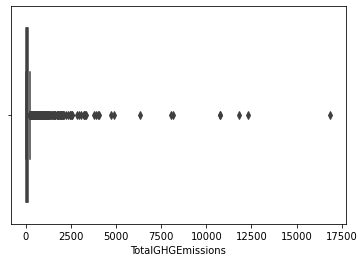

In [35]:
# CO2 Outliers
sns.boxplot(x='TotalGHGEmissions', data=df)
plt.show()

In [36]:
df['TotalGHGEmissions'].describe()

count     6641.000000
mean       112.815404
std        457.221938
min         -0.800000
25%          9.470000
50%         33.260000
75%         91.490000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [37]:
df.loc[df['TotalGHGEmissions']== df['TotalGHGEmissions'].max()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,ZipCode,Latitude,Longitude,Address,City,State
3319,43,2016,Campus,Mixed Use Property,plant 2 site,0022000005,NaN,2,greater duwamish,1992,...,NaN,NaN,NaN,NaN,98108.0,47.53493,-122.31788,7755 E MARGINAL WAY S,Seattle,WA


Un site dégage plus de CO2 que la moyenne. Il s'agit d'un aeroport. il semble logique qu'un aeroport dégage autant de Co2. On va donc le garder dans notre jeu de données.

### Superficies outliers 

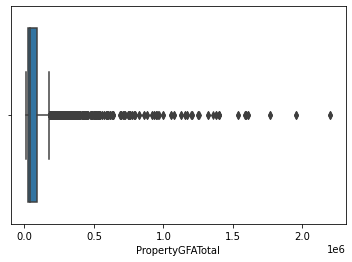

In [38]:
sns.boxplot(x='PropertyGFATotal', data=df)
plt.show()

In [39]:
df['PropertyGFATotal'].describe()

count    6.659000e+03
mean     9.154033e+04
std      1.501216e+05
min      1.128500e+04
25%      2.851550e+04
50%      4.408600e+04
75%      8.954950e+04
max      2.200000e+06
Name: PropertyGFATotal, dtype: float64

Il n'y a pas de superficie totale négative.

In [40]:
# Suppression des colonnes redondantes et non utilisées dans la suite
df.drop(["PropertyName","LargestPropertyUseTypeGFA", "SiteEUI(kBtu/sf)", "SourceEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)",
         "SiteEnergyUseWN(kBtu)", "Electricity(kWh)", "NaturalGas(therms)", "TaxParcelIdentificationNumber","Location","CouncilDistrictCode",
         "ListOfAllPropertyUseTypes", "LargestPropertyUseType", "DefaultData", "ComplianceStatus", "State", 
         "Seattle Police Department Micro Community Policing Plan Areas","SPD Beats", "ZipCode"], axis=1, inplace=True)

In [41]:
# Suppression des valeurs émission de CO2 inférieures à 0
df = df.loc[df["TotalGHGEmissions"] > 0]

In [42]:
# Suppression des valeurs emission de Co2 par mettre carée inférieures à 0
df = df.loc[df["GHGEmissionsIntensity"] > 0]

In [43]:
# Suppression des surfaces inférieures à 0
df = df.loc[df["PropertyGFATotal"] > 0]

In [44]:
# Suppression des valeurs energétiques inférieures à 0
df = df.loc[df["SiteEnergyUse(kBtu)"] > 0]

In [45]:
df.shape

(6609, 30)

In [46]:
df['PrimaryPropertyType'].isna().sum()

0

In [47]:
df['SecondLargestPropertyUseType'].isna().sum()

3399

In [48]:
df['ThirdLargestPropertyUseType'].isna().sum()

5463

In [49]:
# remplacer les valeurs manquantes par la mention "N_C" (Not Concerned). 
# lorsque la donnée n'est pas présente il ne s'agit pas d'une donnée manquante mais d'une propriété qui ne possède qu'un seul 
# usage.
df['PrimaryPropertyType'].fillna(value="N_C", inplace=True)
df["SecondLargestPropertyUseType"].fillna(value="N_C", inplace=True)
df["ThirdLargestPropertyUseType"].fillna(value="N_C", inplace=True)

In [50]:
# Le raisonnement pour les surfaces a été le même. La valeur choisie sera -1 au lieu de N.C.
df["SecondLargestPropertyUseTypeGFA"].fillna(value=-1, inplace=True)
df["ThirdLargestPropertyUseTypeGFA"].fillna(value=-1, inplace=True)

# Harmonisation des modalités
Certains bâtiments ont la même vocation mais ont des appellations différentes. On va les regrouper sous le même nom.

In [51]:
# Regroupement de certains types de  bâtiments dans des catégories uniques
property_type = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office",
                 "Refrigerated Warehouse" : "Warehouse",
                 "Non-Refrigerated Warehouse" : "Warehouse",
                 "Self-Storage Facility" : "Warehouse",
                 "Supermarket/Grocery" : "Supermarket/Store",
                 "Retail Store" : "Supermarket/Store"}

for key, value in property_type.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value
    

In [52]:
# Regroupement des établissements scolaires dans une catégorie unique 
property_use = {"College/University" : "University",
                "SPS-District K-12" : "K-12 School"}

for key, value in property_use.items():
    df['PrimaryPropertyType'].loc[df["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value    

In [53]:
property_type = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office",
                 "Refrigerated Warehouse" : "Warehouse",
                 "Non-Refrigerated Warehouse" : "Warehouse",
                 "Self-Storage Facility" : "Warehouse",
                 "Supermarket/Grocery" : "Supermarket/Store",
                 "Retail Store" : "Supermarket/Store",
                 "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in property_type.items():
    df['SecondLargestPropertyUseType'].loc[df["SecondLargestPropertyUseType"].str.contains(key, case=False, regex=False)] = value

In [54]:
property_type = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "Medical Office" : "Office",
                 "Refrigerated Warehouse" : "Warehouse",
                 "Non-Refrigerated Warehouse" : "Warehouse",
                 "Self-Storage Facility" : "Warehouse",
                 "Supermarket/Grocery" : "Supermarket/Store",
                 "Retail Store" : "Supermarket/Store",
                 "Residence Hall/Dormitory" : "Residence Hall"}

for key, value in property_type.items():
    df['ThirdLargestPropertyUseType'].loc[df["ThirdLargestPropertyUseType"].str.contains(key, case=False, regex=False)] = value

In [55]:
# Création d'une variable "Age" qui correspond à l'age du batiement à partir de "DataYear" & "YearBuilt"
df["Age"] = df["DataYear"] - df["YearBuilt"]

In [56]:
# Création d'une variable "Parking" qui correspond au fait que le bâtiement possède un parking ou pas. 

def parking(data):
    if data["PropertyGFAParking"] >0:
        val = "YES"
    else:
        val="NO"
    return val

df["Parking"] = df.apply(parking, axis=1)

In [57]:
df

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,TotalGHGEmissions,GHGEmissionsIntensity,2010 Census Tracts,City Council Districts,Latitude,Longitude,Address,City,Age,Parking
0,1,2015,NonResidential,Hotel,downtown,1927,1.0,12.0,88434,0,...,249.43,2.64,NaN,NaN,47.61220,-122.33799,NaN,NaN,88,NO
1,2,2015,NonResidential,Hotel,downtown,1996,1.0,11.0,103566,15064,...,263.51,2.38,NaN,NaN,47.61317,-122.33393,NaN,NaN,19,YES
2,3,2015,NonResidential,Hotel,downtown,1969,1.0,41.0,961990,0,...,2061.48,1.92,NaN,NaN,47.61393,-122.33810,NaN,NaN,46,NO
3,5,2015,NonResidential,Hotel,downtown,1926,1.0,10.0,61320,0,...,1936.34,31.38,NaN,NaN,47.61412,-122.33664,NaN,NaN,89,NO
4,8,2015,NonResidential,Hotel,downtown,1980,1.0,18.0,119890,12460,...,507.70,4.02,NaN,NaN,47.61375,-122.34047,NaN,NaN,35,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6655,50222,2016,Nonresidential COS,Office,greater duwamish,1990,1.0,1.0,12294,0,...,20.94,1.70,NaN,NaN,47.56722,-122.31154,1600 S Dakota St,Seattle,26,NO
6656,50223,2016,Nonresidential COS,Other,downtown,2004,1.0,1.0,16000,0,...,32.17,2.01,NaN,NaN,47.59625,-122.32283,719 8th Ave S,Seattle,12,NO
6657,50224,2016,Nonresidential COS,Other,magnolia / queen anne,1974,1.0,1.0,13157,0,...,223.54,16.99,NaN,NaN,47.63644,-122.35784,1920 1st Ave W,Seattle,42,NO
6658,50225,2016,Nonresidential COS,Mixed Use Property,greater duwamish,1989,1.0,1.0,14101,0,...,22.11,1.57,NaN,NaN,47.52832,-122.32431,8319 8th Ave S,Seattle,27,NO


In [58]:
df.shape

(6609, 32)

In [59]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       '2010 Census Tracts', 'City Council Districts', 'Latitude', 'Longitude',
       'Address', 'City', 'Age', 'Parking'],
      dtype='object')

In [60]:
# Suppression des colonnes non utilisées
df.drop(['Address', 'DataYear', 'BuildingType', 'PropertyGFABuilding(s)', 'PropertyGFAParking', 'SourceEUIWN(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)', 'GHGEmissionsIntensity', 'City', '2010 Census Tracts', 'City Council Districts'], axis=1, inplace=True)

In [61]:
df.shape

(6609, 18)

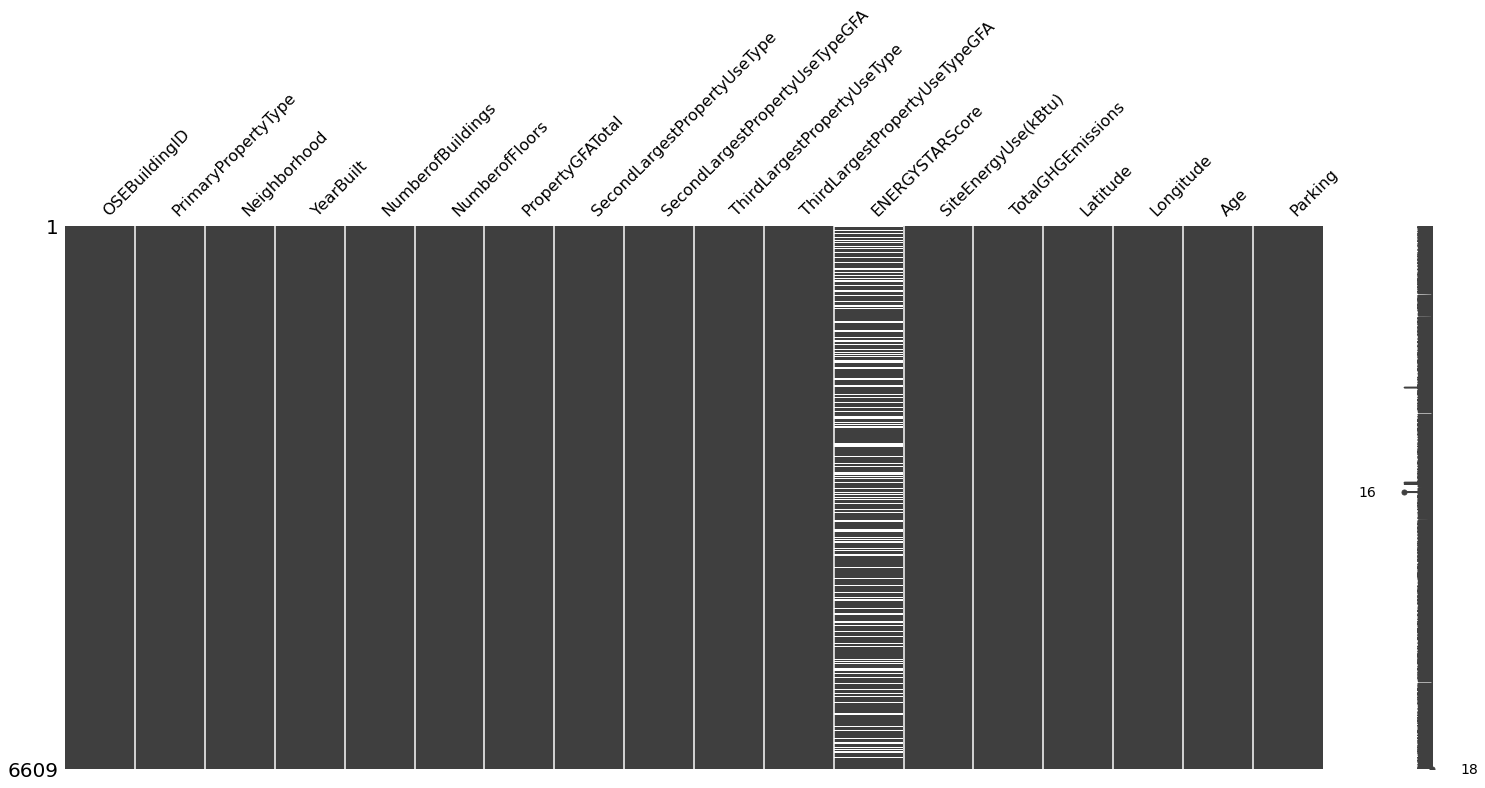

In [62]:
msno.matrix(df);

# 2 - Analyse exploratoire ¶

In [63]:
df.shape

(6609, 18)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6609 entries, 0 to 6659
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6609 non-null   int64  
 1   PrimaryPropertyType              6609 non-null   object 
 2   Neighborhood                     6609 non-null   object 
 3   YearBuilt                        6609 non-null   int64  
 4   NumberofBuildings                6609 non-null   float64
 5   NumberofFloors                   6601 non-null   float64
 6   PropertyGFATotal                 6609 non-null   int64  
 7   SecondLargestPropertyUseType     6609 non-null   object 
 8   SecondLargestPropertyUseTypeGFA  6609 non-null   float64
 9   ThirdLargestPropertyUseType      6609 non-null   object 
 10  ThirdLargestPropertyUseTypeGFA   6609 non-null   float64
 11  ENERGYSTARScore                  5046 non-null   float64
 12  SiteEnergyUse(kBtu) 

### 2.1 Données géographiques

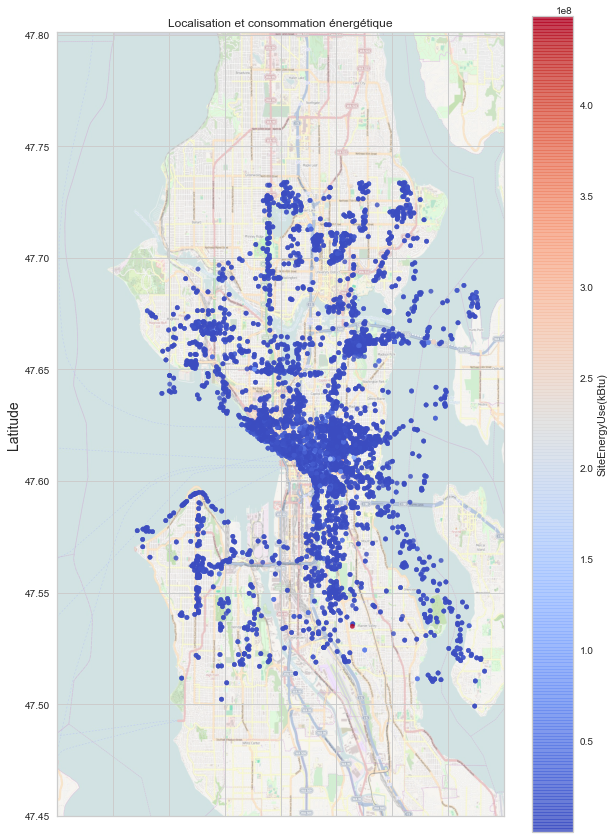

In [116]:
import matplotlib.image as mpimg
seattle_img=mpimg.imread('Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="SiteEnergyUse(kBtu)", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et consommation énergétique")
plt.savefig("Seattle_energy.png")

plt.show()

In [114]:
df[df["Latitude"]<47.54 | df["Latitude"]>47.53].tail(50)

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Age,Parking,Clusters
9995,Low-Rise Multifamily,delridge,1981,1.0,3.0,35122,N_C,-1.0,N_C,-1.0,64.0,8.921500e+05,6.22,47.524510,-122.364240,34,NO,3
9997,Low-Rise Multifamily,delridge,1981,1.0,3.0,35122,N_C,-1.0,N_C,-1.0,43.0,9.365844e+05,6.53,47.524510,-122.364240,35,NO,3
9999,Low-Rise Multifamily,delridge,1966,1.0,3.0,24259,Office,1911.0,N_C,-1.0,NaN,4.368480e+05,3.05,47.518970,-122.355610,49,NO,3
10001,Low-Rise Multifamily,delridge,1966,1.0,3.0,24259,Office,1911.0,N_C,-1.0,NaN,5.470844e+05,3.81,47.518970,-122.355610,50,NO,3
10147,Senior Care Community,southeast,1967,1.0,1.0,141297,N_C,-1.0,N_C,-1.0,69.0,1.894699e+07,698.11,47.535150,-122.265560,48,YES,2
10149,Senior Care Community,southeast,1967,1.0,1.0,141297,N_C,-1.0,N_C,-1.0,76.0,1.942334e+07,717.93,47.535150,-122.265560,49,NO,2
10319,K-12 School,greater duwamish,1971,1.0,2.0,52901,N_C,-1.0,N_C,-1.0,82.0,1.986384e+06,50.98,47.530740,-122.284910,44,NO,2
10321,K-12 School,greater duwamish,1971,1.0,2.0,52901,N_C,-1.0,N_C,-1.0,75.0,2.240342e+06,60.20,47.530740,-122.284910,45,NO,2
10572,Office,southeast,2010,1.0,2.0,25880,N_C,-1.0,N_C,-1.0,14.0,1.838121e+06,21.78,47.519500,-122.269350,5,NO,2
10574,Office,southeast,2010,1.0,2.0,25880,N_C,-1.0,N_C,-1.0,8.0,1.941729e+06,19.81,47.519500,-122.269350,6,NO,2


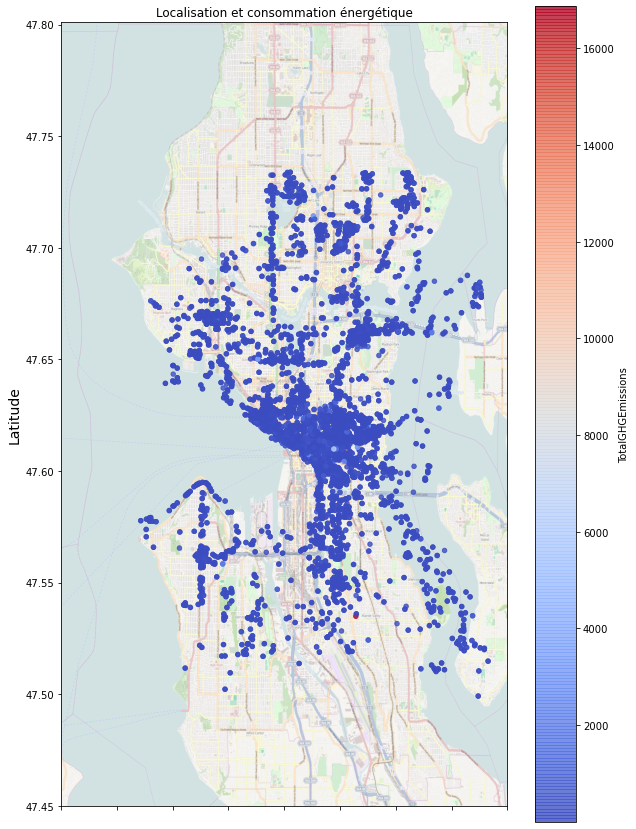

In [66]:
import matplotlib.image as mpimg
seattle_img=mpimg.imread('Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 0.8, c="TotalGHGEmissions", colorbar=True, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.6)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation et consommation énergétique")
plt.savefig("Seattle_CO2.png")

plt.show()



La répartition des bâtiments est identique à la consommation d'énergie.
La majorité des immeubles sont situés au centre ville

Mon idée initiale était de créer avec l'algorithme du K-Means, des clusters avec les quartiers. Cependant, il me 
semble également intéressant de créer des clusters à partir des coordonnées géographiques des bâtiments. l'avantage de le faire par coordonnées géographiques est de ne pas dépendre d'un découpage administratif. il suffit juste d'avoir comme information de base les coordonnées GPS (Latitude/Longitude) du future bâtiment.    

### Clustering par coordonnées GPS : 
##### Elbow method pour déterminer le nombre de clusters optimale

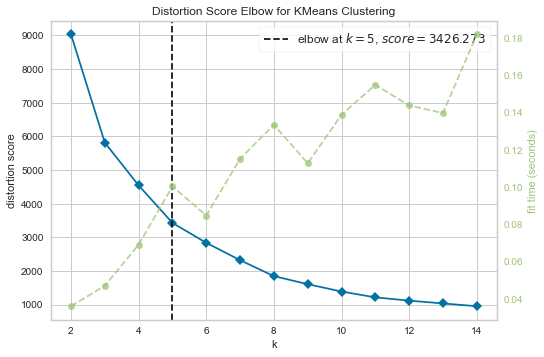

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

scaler = StandardScaler()
X = np.abs(df[["Latitude", "Longitude"]])
X_scaled = scaler.fit_transform(X)

model = KMeans()
visualizer = KElbowVisualizer(model, k =(2, 15))
visualizer.fit(X_scaled)
visualizer.show();

##### Calcul du K-Means et affectation du cluster à chaque bâtiment

In [68]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

clusters = pd.DataFrame(pred, index=df["OSEBuildingID"]).reset_index()
clusters.columns = ["OSEBuildingID", "Clusters"]
df = pd.merge(df, clusters, on="OSEBuildingID")
df.drop_duplicates(inplace=True)
df.tail(50)

,OSEBuildingID,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Latitude,Longitude,Age,Parking,Clusters
13041,50031,Office,magnolia / queen anne,2015,1.0,10.0,513816,Parking,151658.0,Restaurant,1087.000000,NaN,1.876077e+07,214.19,47.62906,-122.34259,1,NO,1
13042,50035,Hotel,downtown,2015,1.0,14.0,144614,N_C,-1.0,N_C,-1.000000,89.0,5.525072e+06,50.32,47.61665,-122.33261,1,NO,1
13043,50037,Office,lake union,2014,1.0,12.0,480702,Parking,136594.0,N_C,-1.000000,99.0,1.272007e+07,147.14,47.62146,-122.33976,2,YES,1
13044,50039,Other,greater duwamish,2015,1.0,2.0,108036,Automobile Dealership,108036.0,N_C,-1.000000,NaN,4.991894e+06,91.98,47.58542,-122.32185,1,NO,1
13045,50044,Mid-Rise Multifamily,southwest,2015,2.0,6.0,271922,Parking,70493.0,N_C,-1.000000,87.0,7.682562e+06,205.45,47.56081,-122.38589,1,YES,3
13046,50045,Office,lake union,2015,1.0,12.0,483397,Parking,147597.0,N_C,-1.000000,98.0,1.399864e+07,202.12,47.62263,-122.33976,1,YES,1
13047,50046,Mid-Rise Multifamily,lake union,2014,1.0,8.0,110964,Parking,27261.0,N_C,-1.000000,98.0,3.220534e+06,74.88,47.62383,-122.33143,2,NO,1
13048,50047,Mid-Rise Multifamily,ballard,2014,2.0,7.0,318835,Parking,82608.0,N_C,-1.000000,100.0,7.180055e+06,165.61,47.66786,-122.38112,2,NO,4
13049,50050,Mid-Rise Multifamily,east,2015,1.0,7.0,92208,Supermarket/Store,10000.0,Parking,9000.000000,100.0,2.015280e+06,40.25,47.61508,-122.32243,1,YES,1
13050,50054,Office,lake union,2014,1.0,13.0,536697,Parking,202178.0,Supermarket/Store,6313.200195,98.0,1.323905e+07,245.16,47.62251,-122.33390,2,YES,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6609 entries, 0 to 13090
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6609 non-null   int64  
 1   PrimaryPropertyType              6609 non-null   object 
 2   Neighborhood                     6609 non-null   object 
 3   YearBuilt                        6609 non-null   int64  
 4   NumberofBuildings                6609 non-null   float64
 5   NumberofFloors                   6601 non-null   float64
 6   PropertyGFATotal                 6609 non-null   int64  
 7   SecondLargestPropertyUseType     6609 non-null   object 
 8   SecondLargestPropertyUseTypeGFA  6609 non-null   float64
 9   ThirdLargestPropertyUseType      6609 non-null   object 
 10  ThirdLargestPropertyUseTypeGFA   6609 non-null   float64
 11  ENERGYSTARScore                  5046 non-null   float64
 12  SiteEnergyUse(kBtu)

#### Modification du type de la colonne Cluster 

In [70]:
df["Clusters"] = df["Clusters"].astype("int64")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6609 entries, 0 to 13090
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6609 non-null   int64  
 1   PrimaryPropertyType              6609 non-null   object 
 2   Neighborhood                     6609 non-null   object 
 3   YearBuilt                        6609 non-null   int64  
 4   NumberofBuildings                6609 non-null   float64
 5   NumberofFloors                   6601 non-null   float64
 6   PropertyGFATotal                 6609 non-null   int64  
 7   SecondLargestPropertyUseType     6609 non-null   object 
 8   SecondLargestPropertyUseTypeGFA  6609 non-null   float64
 9   ThirdLargestPropertyUseType      6609 non-null   object 
 10  ThirdLargestPropertyUseTypeGFA   6609 non-null   float64
 11  ENERGYSTARScore                  5046 non-null   float64
 12  SiteEnergyUse(kBtu)

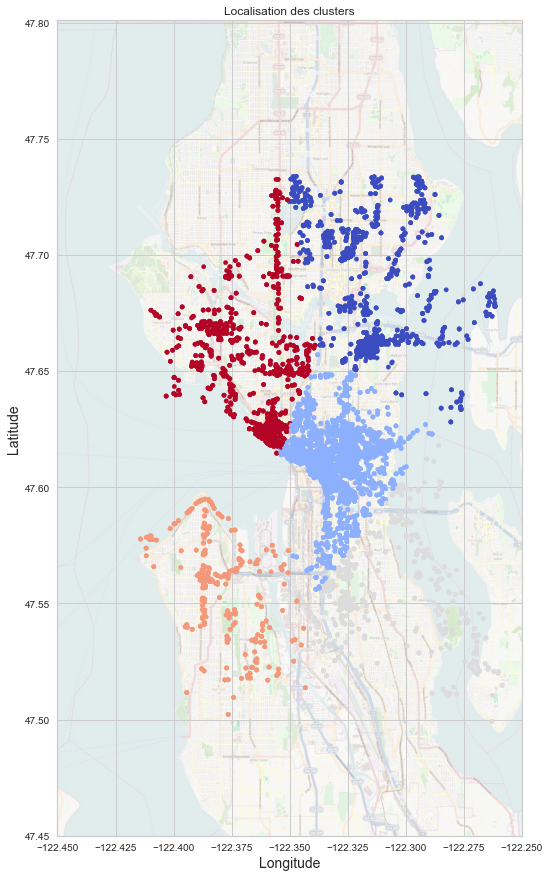

In [72]:
seattle_img=mpimg.imread('Map_Seattle.jpg')
ax = df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,15),
        alpha = 1, c="Clusters", colorbar=False, cmap=plt.get_cmap("coolwarm"))
plt.imshow(seattle_img, extent=[-122.45, -122.25, 47.45, 47.801], alpha=0.4)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Localisation des clusters")
plt.savefig("Seattle_clusters.png")

plt.show()

### Analyses univariées

Variables numériques 

In [73]:
var_num = ["YearBuilt","Age", "ENERGYSTARScore", "PropertyGFATotal", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA",
           "SiteEnergyUse(kBtu)", "TotalGHGEmissions"]

Variables catégorielles 

In [74]:
var_cat = ["PrimaryPropertyType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType", "Neighborhood", "Parking",
           "NumberofBuildings", "NumberofFloors", "Clusters"]

Distribution des variables numériques 

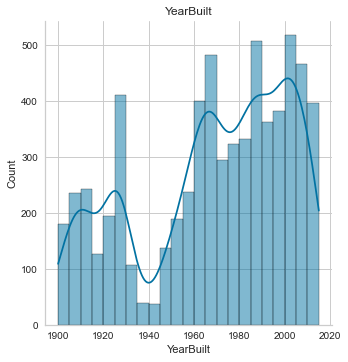

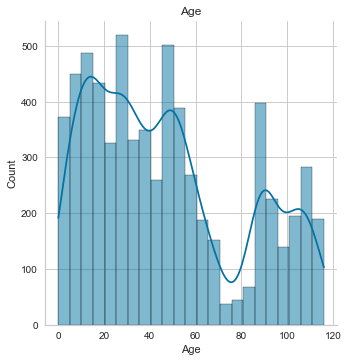

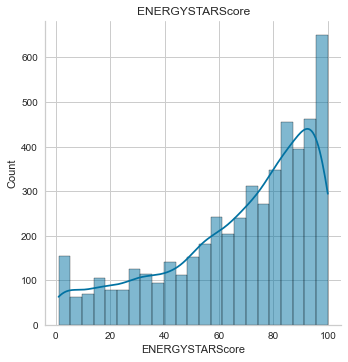

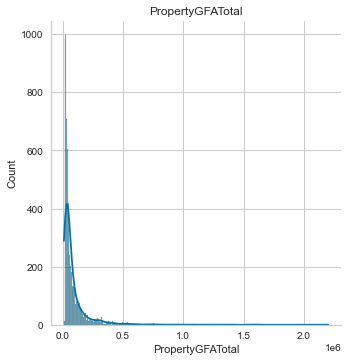

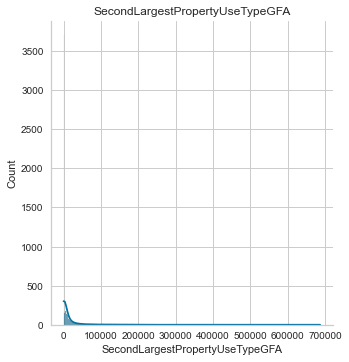

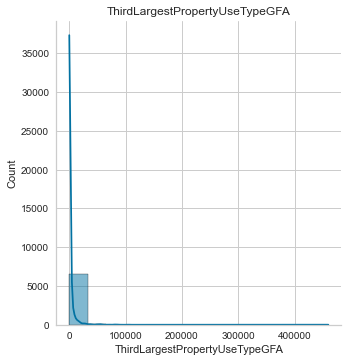

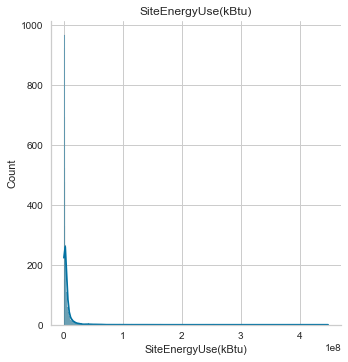

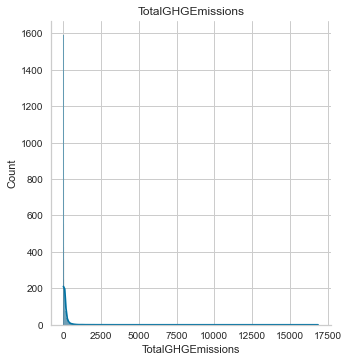

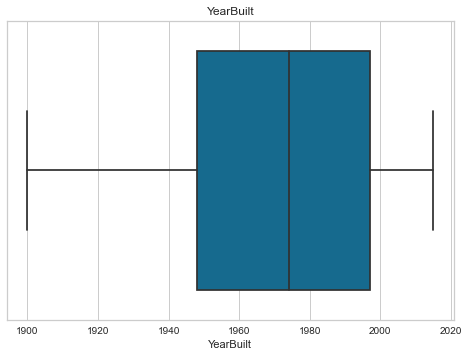

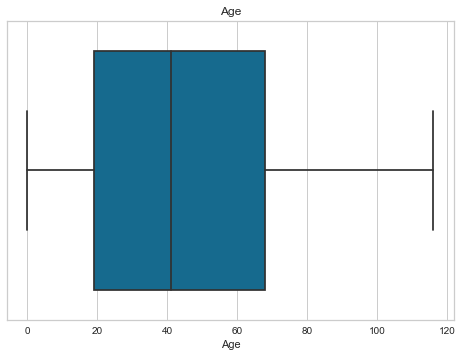

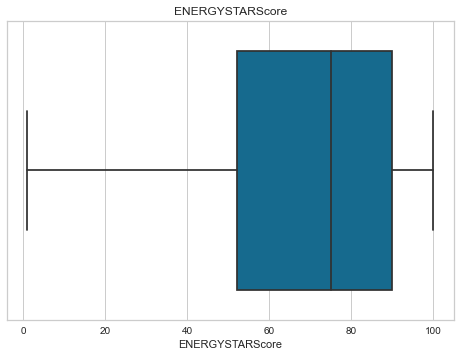

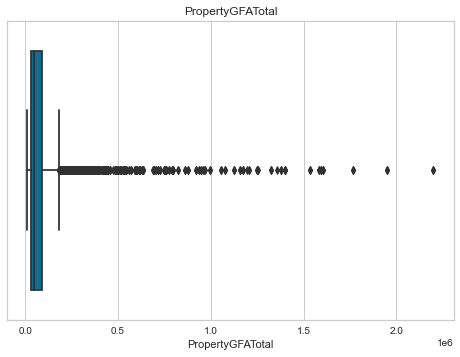

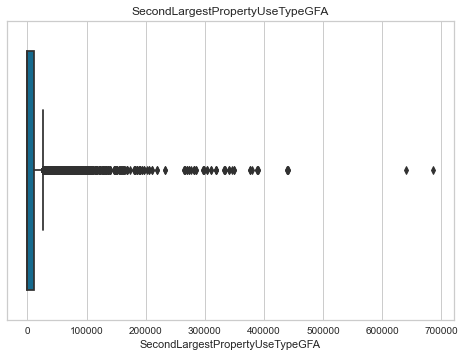

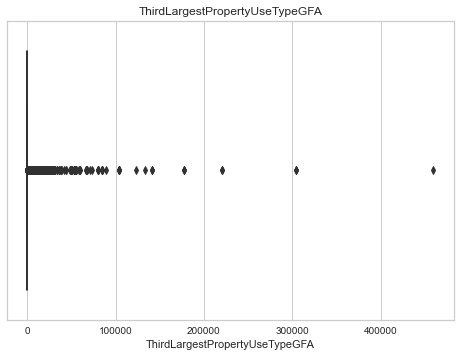

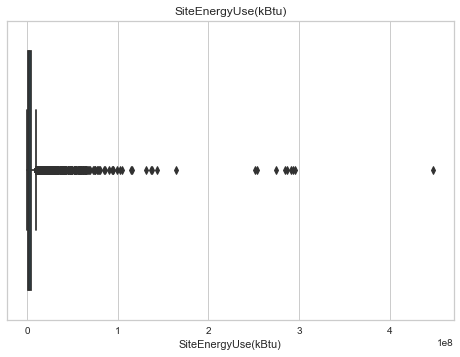

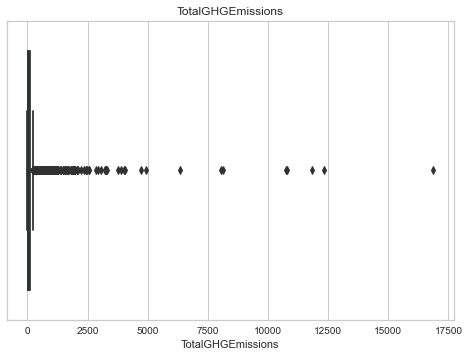

In [75]:
for cols in var_num:
    sns.displot(x=cols, data=df, kde=True)
    plt.title(cols)
    plt.show()

for cols in var_num:
    sns.boxplot(x=cols, data=df)
    plt.title(cols)
    plt.show()

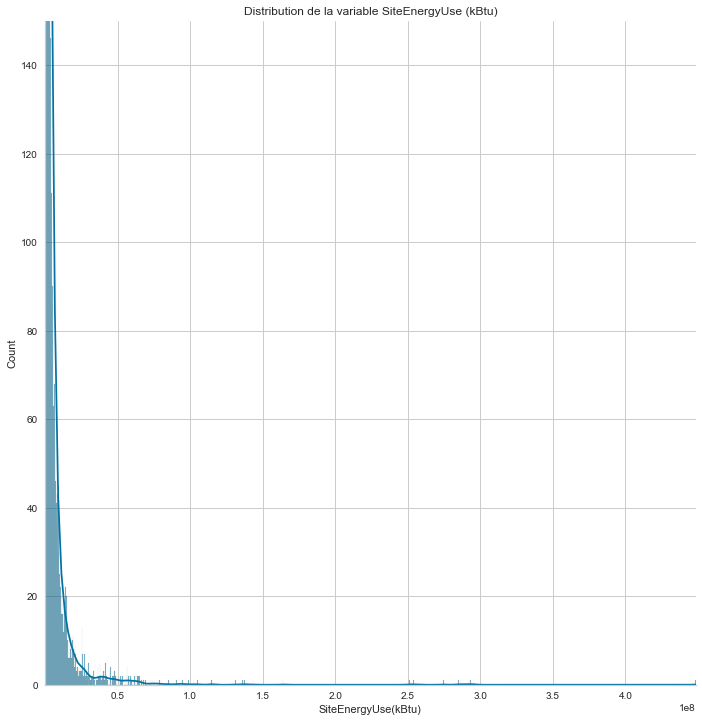

In [76]:
sns.displot(x="SiteEnergyUse(kBtu)", data=df, kde=True, height=10)
plt.xlim(df["SiteEnergyUse(kBtu)"].min(), df["SiteEnergyUse(kBtu)"].max())
plt.ylim(0, 150)
plt.title("Distribution de la variable SiteEnergyUse (kBtu)")
plt.savefig("SiteEnergyUse(kBtu).png")
plt.show()

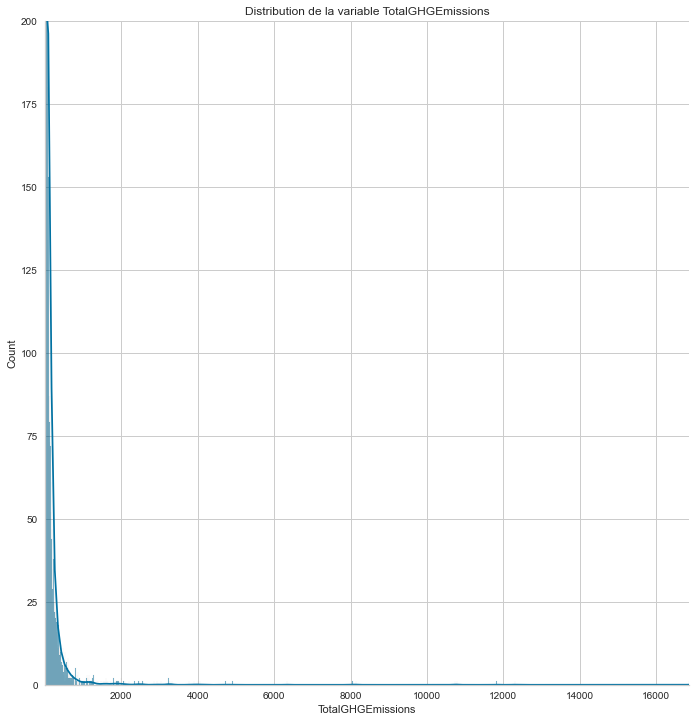

In [77]:
sns.displot(x="TotalGHGEmissions", data=df, kde=True, height=10)
plt.xlim(df["TotalGHGEmissions"].min(), df["TotalGHGEmissions"].max())
plt.ylim(0, 200)
plt.title("Distribution de la variable TotalGHGEmissions")
plt.savefig("CO2_emissions.png")
plt.show()

In [78]:
pg.normality(df,method="normaltest")

,W,pval,normal
OSEBuildingID,91.364135,1.447206e-20,False
YearBuilt,1088.214599,4.979689e-237,False
NumberofBuildings,15772.651126,0.000000e+00,False
NumberofFloors,7586.084143,0.000000e+00,False
PropertyGFATotal,7551.420181,0.000000e+00,False
SecondLargestPropertyUseTypeGFA,7969.010030,0.000000e+00,False
ThirdLargestPropertyUseTypeGFA,14278.346014,0.000000e+00,False
ENERGYSTARScore,487.648015,1.284041e-106,False
SiteEnergyUse(kBtu),12297.825762,0.000000e+00,False
TotalGHGEmissions,14515.702095,0.000000e+00,False


In [79]:
pg.homoscedasticity(df, method="levene")

,W,pval,equal_var
levene,NaN,NaN,False


####  Les données ne suivent pas une loi normale et l'homogénéité des variances n'est pas respectée.

### Quels sont les batiments qui consomment le plus d'énergie et qui émettent le plus de CO2 ??
#### Energie

In [80]:
df.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                 1.360147e+08
Laboratory               2.620197e+07
University               1.763785e+07
Hotel                    1.259181e+07
Other                    9.678969e+06
Mixed Use Property       9.119227e+06
High-Rise Multifamily    8.853671e+06
Senior Care Community    8.834183e+06
Office                   8.399204e+06
Supermarket/Store        6.350544e+06
Restaurant               5.243091e+06
Residence Hall           3.448770e+06
K-12 School              3.064561e+06
Distribution Center      2.801173e+06
Mid-Rise Multifamily     2.778534e+06
Warehouse                1.835270e+06
Low-Rise Multifamily     1.331807e+06
Worship Facility         1.179291e+06
Name: SiteEnergyUse(kBtu), dtype: float64

#### Emission de CO2

In [81]:
df.groupby("PrimaryPropertyType")["TotalGHGEmissions"].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                 4868.863000
Laboratory                827.916364
University                473.922391
Hotel                     414.582733
Senior Care Community     269.331591
High-Rise Multifamily     229.193077
Other                     212.459800
Mixed Use Property        209.140428
Restaurant                192.588636
Supermarket/Store         128.713511
Office                    112.254156
Residence Hall             97.131842
K-12 School                91.969302
Mid-Rise Multifamily       62.647259
Distribution Center        50.105472
Worship Facility           42.007535
Warehouse                  38.926489
Low-Rise Multifamily       26.164413
Name: TotalGHGEmissions, dtype: float64

#### Les hôpitaux sont les bâtiments qui consomment le plus d'énergie et qui émettent le plus de CO2.

### Quels sont les clusters ( zones géographiques) qui consomment le plus d'énergie et qui émettent le plus de CO2 ??
#### Energie

In [82]:
df.groupby("Clusters")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

Clusters
1    7.132595e+06
0    3.838368e+06
2    3.801842e+06
4    3.027461e+06
3    2.515971e+06
Name: SiteEnergyUse(kBtu), dtype: float64

#### Emission de CO2

In [83]:
df.groupby("Clusters")["TotalGHGEmissions"].mean().sort_values(ascending=False)

Clusters
1    157.491030
2     90.097846
0     87.878357
4     66.415741
3     55.488434
Name: TotalGHGEmissions, dtype: float64

#### Les bâtiments présents dans le cluster 3 sont ceux qui consomment le plus d'énergie et rejettent le plus de CO2.
Voyons voir si la majorité des hôpitaux sont dans ce même cluster 3 ?? 

In [84]:
df.loc[df["PrimaryPropertyType"] == "Hospital"].shape

(20, 19)

In [85]:
df_clusters=df[df["Clusters"] == 3] 
df_clusters[df_clusters["PrimaryPropertyType"] == "Hospital"].shape 

(2, 19)

In [86]:
df_clusters_=df[df["Clusters"] == 4] 
df_clusters_[df_clusters_["PrimaryPropertyType"] == "Hospital"].shape 

(2, 19)

#### Il y a 20 hôpitaux dans la ville de seattle. 50% sont dans le cluster 3, 30% dans le cluster 4

In [87]:
df.loc[df["PrimaryPropertyType"] == "Laboratory"].shape

(11, 19)

In [88]:
df_clusters=df[df["Clusters"] == 3] 
df_clusters[df_clusters["PrimaryPropertyType"] == "Laboratory"].shape 

(0, 19)

In [89]:
df_clusters=df[df["Clusters"] == 4] 
df_clusters[df_clusters["PrimaryPropertyType"] == "Laboratory"].shape 

(3, 19)

## Analyses bivariées 
#### Matrice de correlation : 

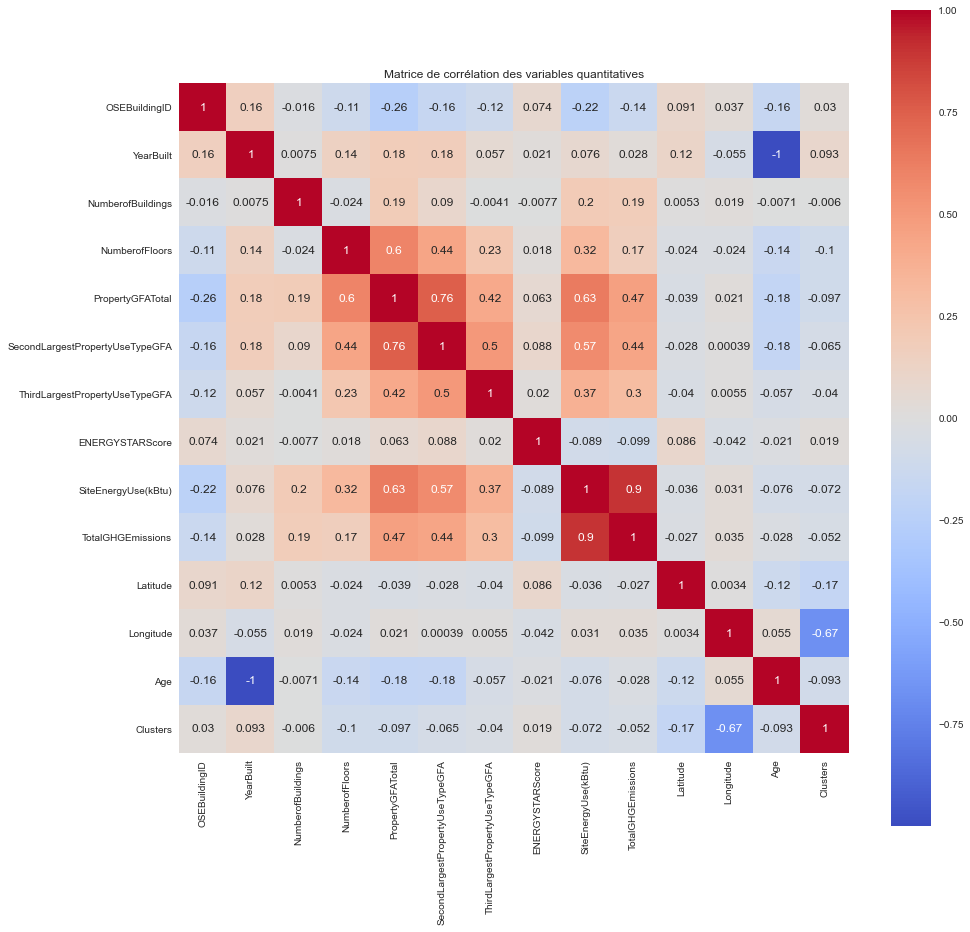

In [90]:
matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(matrix, square=True, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

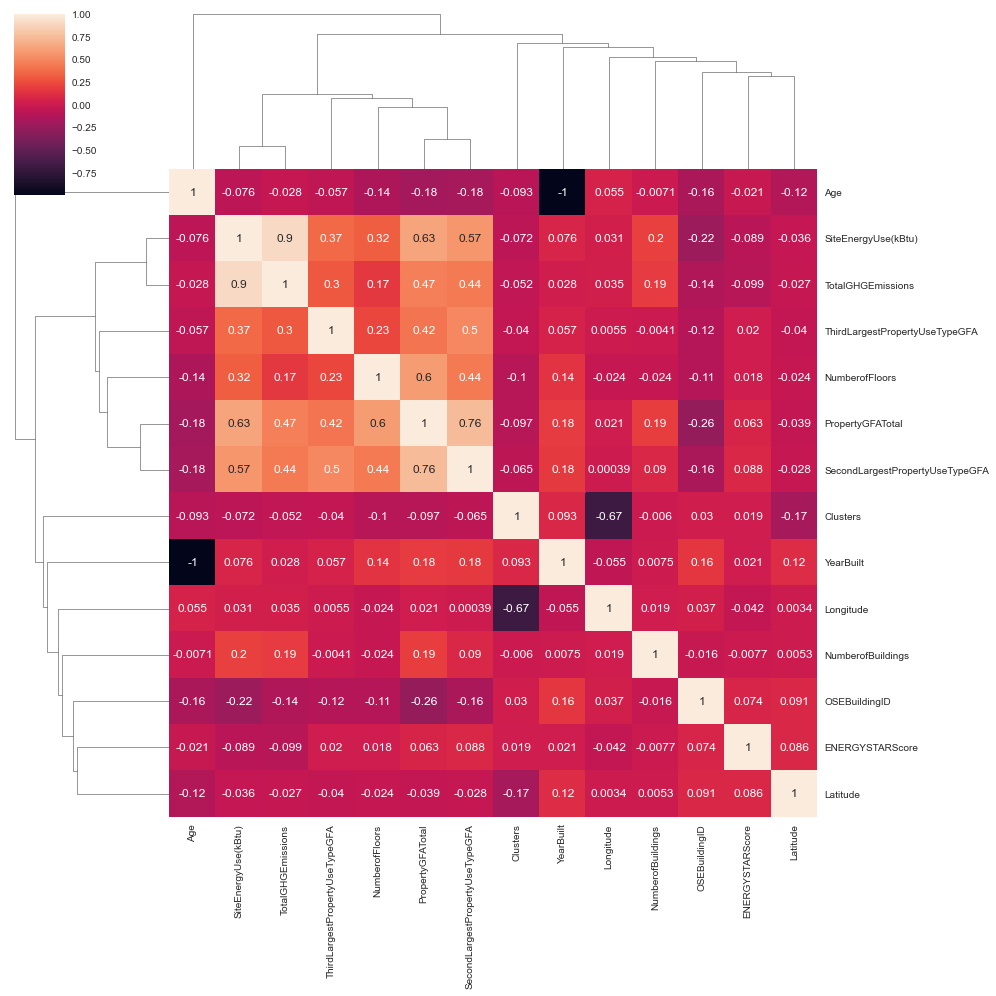

In [109]:
sns.clustermap(matrix,figsize=(14,14), annot=True);

##### On observe une forte corrélation entre la consommation d'énergie et les émissions de gaz à effets de serre.

In [91]:
matrix['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

SiteEnergyUse(kBtu)                1.000000
TotalGHGEmissions                  0.903317
PropertyGFATotal                   0.633878
SecondLargestPropertyUseTypeGFA    0.569744
ThirdLargestPropertyUseTypeGFA     0.374414
NumberofFloors                     0.321731
NumberofBuildings                  0.198927
YearBuilt                          0.076308
Longitude                          0.031319
Latitude                          -0.036159
Clusters                          -0.071875
Age                               -0.076200
ENERGYSTARScore                   -0.089258
OSEBuildingID                     -0.223326
Name: SiteEnergyUse(kBtu), dtype: float64

##### La superficie et le nombre d'étages et de bâtiments sont corrélés avec la consommation d'énergie.

In [92]:
matrix['TotalGHGEmissions'].sort_values(ascending=False)

TotalGHGEmissions                  1.000000
SiteEnergyUse(kBtu)                0.903317
PropertyGFATotal                   0.465229
SecondLargestPropertyUseTypeGFA    0.439750
ThirdLargestPropertyUseTypeGFA     0.297005
NumberofBuildings                  0.187020
NumberofFloors                     0.168605
Longitude                          0.035492
YearBuilt                          0.028368
Latitude                          -0.026654
Age                               -0.028241
Clusters                          -0.052250
ENERGYSTARScore                   -0.099025
OSEBuildingID                     -0.136016
Name: TotalGHGEmissions, dtype: float64

##### La superficie et le nombre d'étages et de bâtiments sont corrélés avec l'émission de CO2

#### Est-ce que le quartier a un effet sur la consommation d'energie ?? 

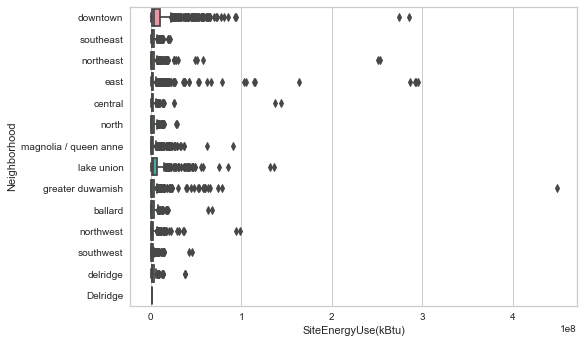

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,13,6595,13.686262,1.271552e-30,0.02627


In [93]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="Neighborhood", data=df)
plt.show()
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="Neighborhood")

Le quartier n'a aucun effet sur la consommation d'energie

#### Est-ce que le type de bâtiment a un effet sur la consommation d'energie ?? 

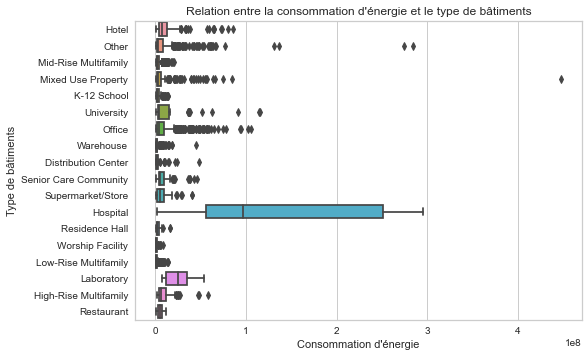

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,17,6591,171.402408,0.0,0.306564


In [94]:
sns.boxplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=df)
plt.xlabel("Consommation d'énergie")
plt.ylabel("Type de bâtiments")
plt.title("Relation entre la consommation d'énergie et le type de bâtiments")
plt.savefig("bâtiment_vs_energie.png")
plt.show()
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="PrimaryPropertyType")

Le type de bâtiment va avoir un large effet sur la consommation d'énergie.

#### Est-ce que la zone géographique (Clusters) a un effet sur la consommation d'énergie ?

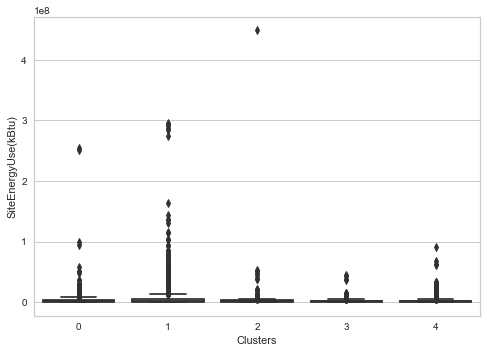

,Source,ddof1,ddof2,F,p-unc,np2
0,Clusters,4,6604,28.4305,1.865920e-23,0.016929


In [95]:
sns.boxplot(y="SiteEnergyUse(kBtu)", x="Clusters", data=df)
plt.show()
pg.anova(data=df, dv="SiteEnergyUse(kBtu)", between="Clusters")

Il ne semble pas avoir de lien entre les clusters et la consommation d'énergie.

#### Est-ce que le quartier a un effet sur l'émission de CO2 ?? 

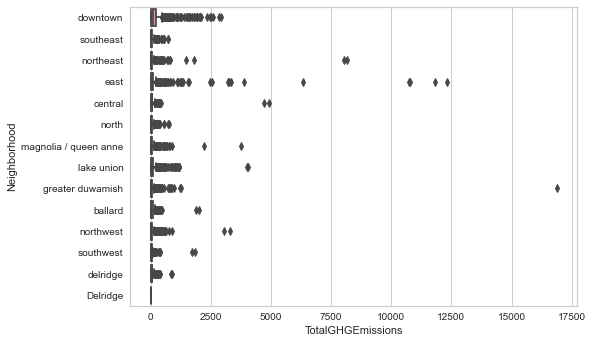

,Source,ddof1,ddof2,F,p-unc,np2
0,Neighborhood,13,6595,5.796513,9.561164e-11,0.011297


In [96]:
sns.boxplot(x="TotalGHGEmissions", y="Neighborhood", data=df)
plt.show()
pg.anova(data=df, dv="TotalGHGEmissions", between="Neighborhood")

Il y a un effet modéré de la localisation d'un bâtiment dans un quartier sur les émissions de CO2.

#### Est-ce que le type de bâtiment a un effet sur les émissions de CO2 ??

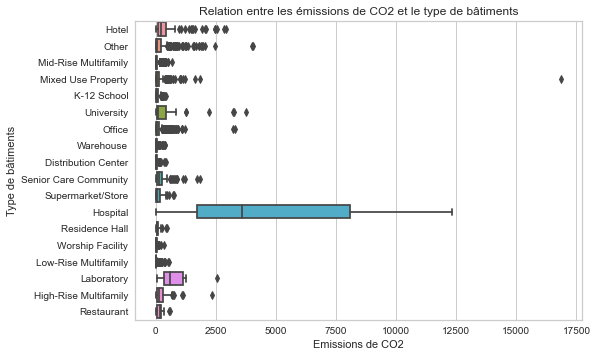

,Source,ddof1,ddof2,F,p-unc,np2
0,PrimaryPropertyType,17,6591,226.213526,0.0,0.368474


In [97]:
sns.boxplot(x="TotalGHGEmissions", y="PrimaryPropertyType", data=df)
plt.xlabel("Emissions de CO2")
plt.ylabel("Type de bâtiments")
plt.title("Relation entre les émissions de CO2 et le type de bâtiments")
plt.savefig("bâtiment_vs_co2.png")
plt.show()
pg.anova(data=df, dv="TotalGHGEmissions", between="PrimaryPropertyType")

Il y a un effet important du type de bâtiments sur les émissions de CO2.

#### Est-ce que la zone géographique (Clusters) a un effet sur les émissions de CO2 ??

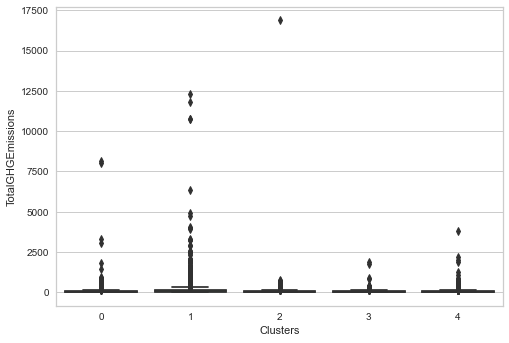

,Source,ddof1,ddof2,F,p-unc,np2
0,Clusters,4,6604,13.652358,4.353938e-11,0.008201


In [98]:
sns.boxplot(y="TotalGHGEmissions", x="Clusters", data=df)
plt.show()
pg.anova(data=df, dv="TotalGHGEmissions", between="Clusters")

Il n'y a pas d'effet du cluster sur les émissions de CO2.

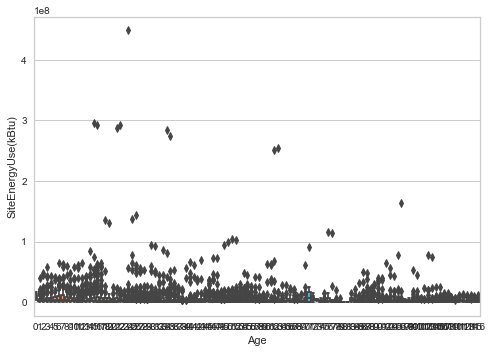

,Source,ddof1,ddof2,F,p-unc,np2
0,SiteEnergyUse(kBtu),6605,3,1.307298,0.486441,0.999653


In [99]:
sns.boxplot(x="Age", y="SiteEnergyUse(kBtu)", data=df)
plt.show()
pg.anova(data=df, dv="Age", between="SiteEnergyUse(kBtu)")

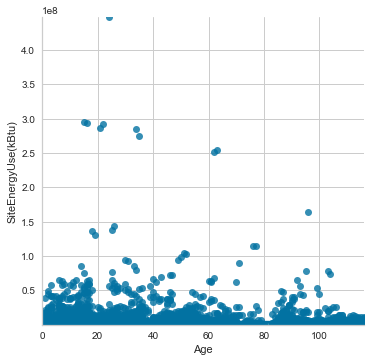

,Source,ddof1,ddof2,F,p-unc,np2
0,SiteEnergyUse(kBtu),6605,3,1.307298,0.486441,0.999653


In [100]:
sns.lmplot(x="Age", y="SiteEnergyUse(kBtu)", data=df)
plt.xlim(df["Age"].min(), df["Age"].max())
plt.ylim(df["SiteEnergyUse(kBtu)"].min(), df["SiteEnergyUse(kBtu)"].max())
plt.show()

pg.anova(data=df, dv="Age", between="SiteEnergyUse(kBtu)")

 Il y a un très fort effet de l'âge sur la consommation d'énergie

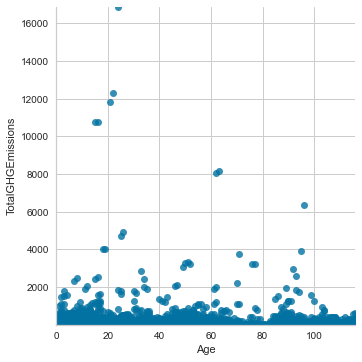

,Source,ddof1,ddof2,F,p-unc,np2
0,TotalGHGEmissions,4873,1735,1.332382,7.135582e-13,0.789127


In [101]:
sns.lmplot(x="Age", y="TotalGHGEmissions", data=df)
plt.xlim(df["Age"].min(), df["Age"].max())
plt.ylim(df["TotalGHGEmissions"].min(), df["TotalGHGEmissions"].max())
plt.show()

pg.anova(data=df, dv="Age", between="TotalGHGEmissions")

Il y a un très fort effet de l'âge sur l'émission de CO2

Suppression de la colonne "OSEBuildingID" 

In [102]:
df.drop(['OSEBuildingID'], axis=1, inplace=True)

### Sauvegarde du Dataset

In [103]:
df.to_csv("building-energy-benchmarking.csv", index=False)

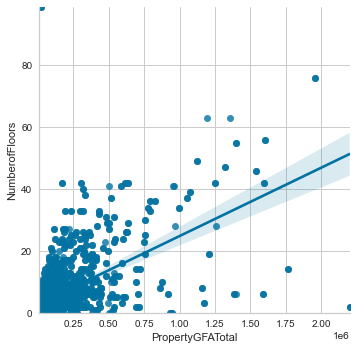

,Source,ddof1,ddof2,F,p-unc,np2
0,NumberofFloors,49,6551,129.185604,0.0,0.491425


In [104]:
sns.lmplot(x="PropertyGFATotal", y="NumberofFloors", data=df)
plt.xlim(df["PropertyGFATotal"].min(), df["PropertyGFATotal"].max())
plt.ylim(df["NumberofFloors"].min(), df["NumberofFloors"].max())
plt.show()

pg.anova(data=df, dv="PropertyGFATotal", between="NumberofFloors")

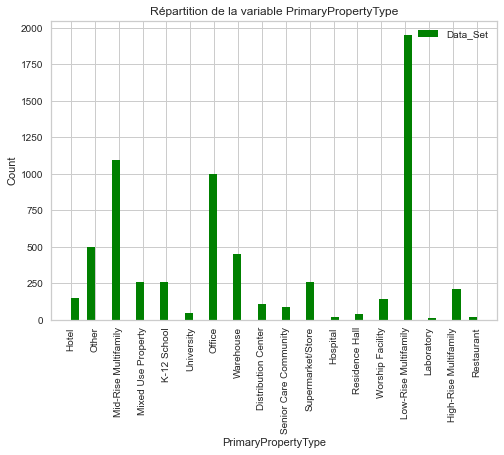

In [105]:
x = df['PrimaryPropertyType']
plt.hist([x], bins = 50, color = ['green'],
         label = ['Data_Set'],
            histtype = 'barstacked')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('PrimaryPropertyType')
plt.title('Répartition de la variable PrimaryPropertyType')
plt.legend()

In [106]:
immeubles_petits= df.loc[df['PrimaryPropertyType']== 'Low-Rise Multifamily']
immeubles_petits['NumberofFloors'].max()

4.0

Nous constatons beaucoup d'immeubles de 4 étages maximum dans la ville de Seatlle. 